In [48]:
# Import dependencies
from sklearn import tree
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Load cleaned data
df = pd.read_csv(os.path.join("final_encoded_ml_data.csv"))
df.head()

,Age,Weight (lb),Ht (inches),Band Size,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,...,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard Fabric,Bra Style
0,77,100,60.0,32,0,4,0,5,1,0,...,0,0,1,0,0,2,1,0,1,21
1,78,100,60.0,32,0,4,0,5,1,0,...,0,0,1,0,0,2,1,0,1,21
2,78,100,58.0,32,0,1,1,5,1,0,...,1,1,0,0,0,0,0,0,0,37
3,78,100,58.0,32,0,1,1,5,1,0,...,1,1,0,0,0,0,0,0,0,37
4,78,100,58.0,32,0,1,1,0,1,0,...,1,1,0,0,0,0,0,0,0,37


In [50]:
# Choose target
target = df["Bra Style"]

In [51]:
# Drop target column
data = df.drop("Bra Style", axis=1)

In [52]:
# Show data
feature_names = data.columns
data.head()

,Age,Weight (lb),Ht (inches),Band Size,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,...,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard Fabric
0,77,100,60.0,32,0,4,0,5,1,0,...,0,0,0,1,0,0,2,1,0,1
1,78,100,60.0,32,0,4,0,5,1,0,...,0,0,0,1,0,0,2,1,0,1
2,78,100,58.0,32,0,1,1,5,1,0,...,0,1,1,0,0,0,0,0,0,0
3,78,100,58.0,32,0,1,1,5,1,0,...,0,1,1,0,0,0,0,0,0,0
4,78,100,58.0,32,0,1,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0


In [53]:
# Import train / test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [54]:
# Apply Decision Tree model
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9169329073482428

In [55]:
# Apply Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

/Users/alienor/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8945686900958466

In [56]:
list(feature_names)

['Age',
 'Weight (lb)',
 'Ht (inches)',
 'Band Size',
 'Cup Size',
 'R/L/B/P',
 'Shoulder Pain',
 'Bra Color',
 'Brand',
 'Wide Straps',
 'Padded Straps',
 'Wired',
 'Molded Foam',
 'Smooth Cup',
 'Has Lace Details',
 'Active',
 'Lace Inset',
 'Front/Back Closure',
 'Difficulty Reaching Back',
 'Embroidery',
 'Jacquard Fabric']

In [57]:
#import graphviz 
#        # clf = RandomForestClassifier()
#        dot_data = tree.export_graphviz(
#            clf.estimators_[5], out_file=None, 
#            feature_names=list(feature_names),  
#            class_names=target,  
#            filled=True, rounded=True,  
#            special_characters=True)  

#        graph = graphviz.Source(dot_data)  
#        graph 


In [58]:
#check_is_fitted(clf, 'tree_')

In [59]:
# Random forest with estimator of 200
from sklearn.ensemble import RandomForestClassifier
rfc200 = RandomForestClassifier(n_estimators=200)
rfc200 = rf.fit(X_train, y_train)
rfc200.score(X_test, y_test)

0.9169329073482428

In [60]:
# Sort features by importances
sorted(zip(rfc200.feature_importances_, feature_names), reverse=True)

[(0.075785599993028, 'Weight (lb)'),
 (0.07362864871725708, 'Jacquard Fabric'),
 (0.07056960348058296, 'Brand'),
 (0.06706969563613994, 'Lace Inset'),
 (0.06607874498031077, 'Age'),
 (0.06124633052309356, 'Wide Straps'),
 (0.06045040137284806, 'Smooth Cup'),
 (0.05864760004465272, 'Molded Foam'),
 (0.05741677298072646, 'Band Size'),
 (0.05681066426180477, 'Has Lace Details'),
 (0.05359037884884141, 'Ht (inches)'),
 (0.048838759523891065, 'Cup Size'),
 (0.04226089275754205, 'Active'),
 (0.03904395983269236, 'Bra Color'),
 (0.03900512833229693, 'Padded Straps'),
 (0.031121343061317988, 'R/L/B/P'),
 (0.026428359173779788, 'Front/Back Closure'),
 (0.019081436831289503, 'Wired'),
 (0.01877135055475135, 'Shoulder Pain'),
 (0.018588032415582174, 'Difficulty Reaching Back'),
 (0.01556629667757105, 'Embroidery')]

In [61]:
data


,Age,Weight (lb),Ht (inches),Band Size,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,...,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard Fabric
0,77,100,60.0,32,0,4,0,5,1,0,...,0,0,0,1,0,0,2,1,0,1
1,78,100,60.0,32,0,4,0,5,1,0,...,0,0,0,1,0,0,2,1,0,1
2,78,100,58.0,32,0,1,1,5,1,0,...,0,1,1,0,0,0,0,0,0,0
3,78,100,58.0,32,0,1,1,5,1,0,...,0,1,1,0,0,0,0,0,0,0
4,78,100,58.0,32,0,1,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,73,100,60.0,34,0,0,0,7,3,1,...,0,0,1,1,0,1,3,1,0,0
1246,73,100,60.0,34,0,0,0,7,3,1,...,0,0,1,1,0,1,3,1,0,0
1247,72,118,62.0,34,0,4,1,7,3,1,...,0,0,1,0,0,0,3,1,0,0
1248,72,118,62.0,34,0,4,1,7,3,1,...,0,0,1,0,0,0,3,1,0,0


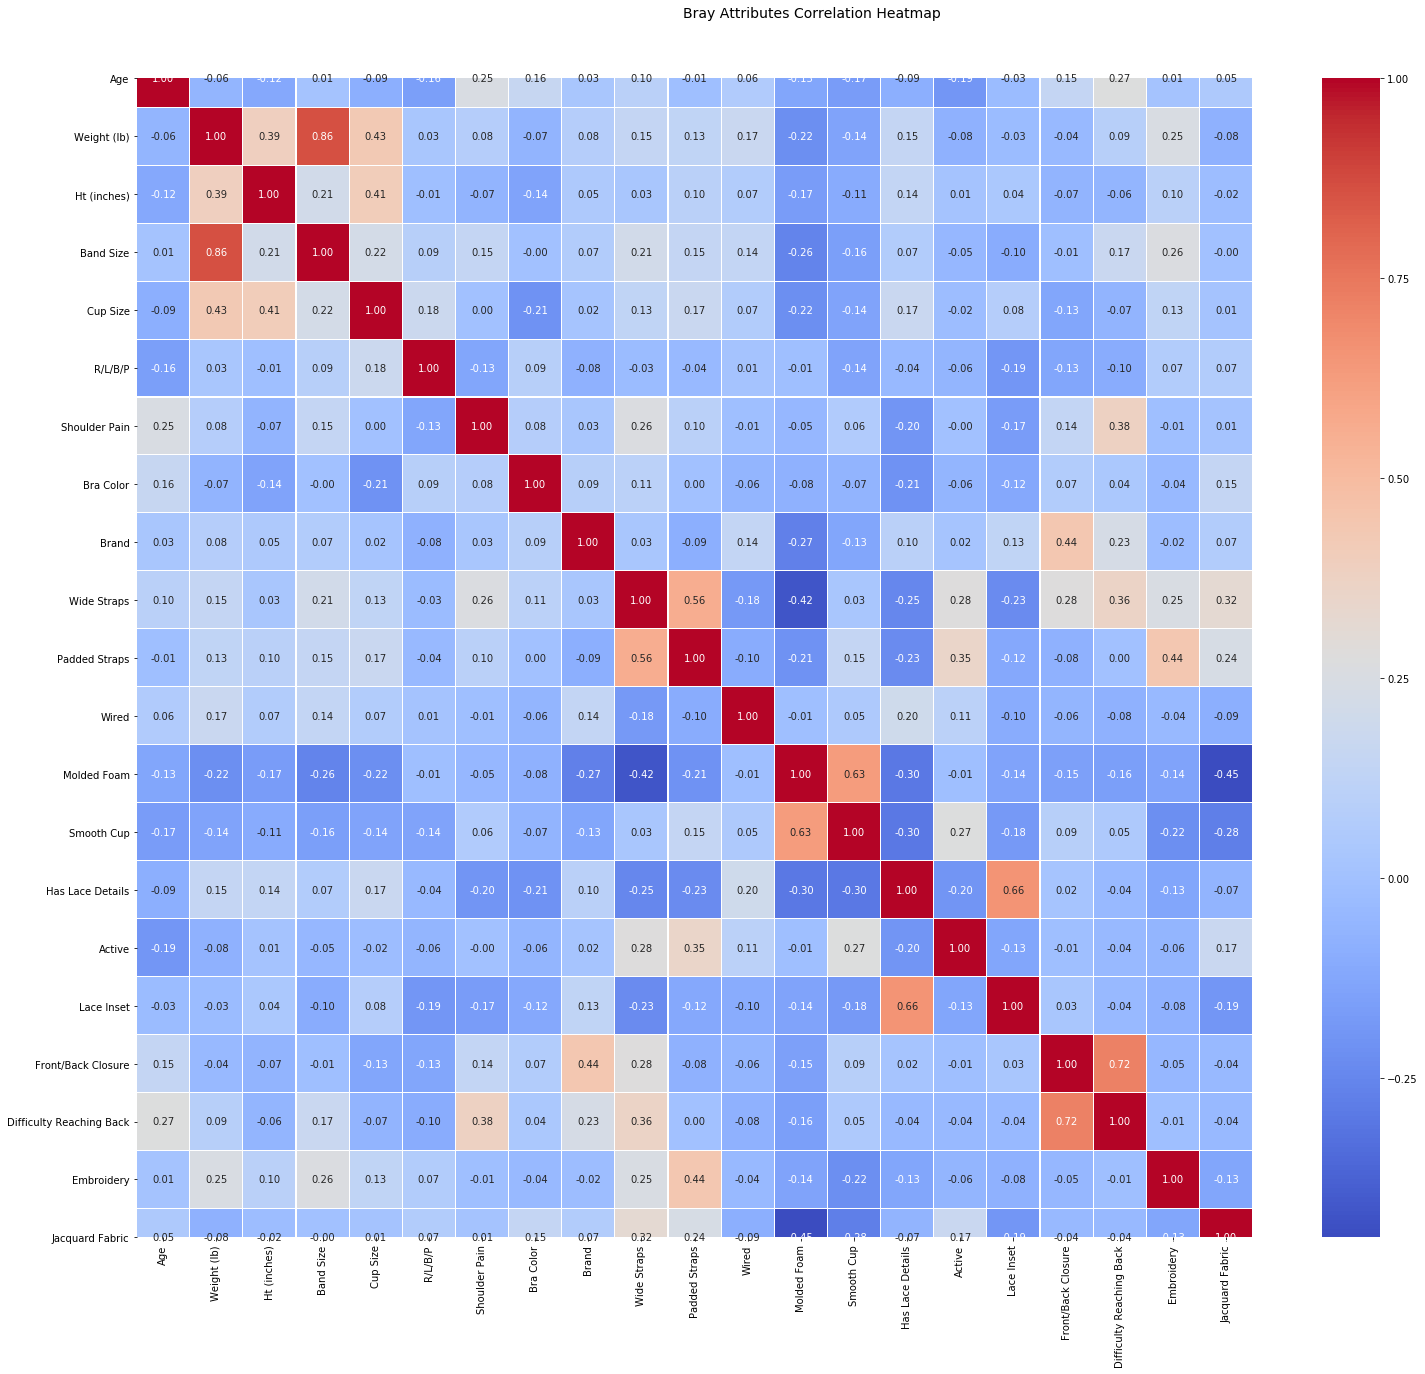

In [62]:
import matplotlib.pyplot as plt 
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
fig = plt.gcf()
fig.set_size_inches(25, 20)
t= f.suptitle('Bray Attributes Correlation Heatmap', fontsize=14)

In [63]:
# Save the model for decision tree
import pickle
filename = 'decision_tree_finalized_model.sav'
pickle.dump(dtc, open(filename, 'wb'))
 
# rf.save("voice_model_trained.h5")

In [64]:
# Run decision tree model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9169329073482428


In [65]:
# Save the model for random forest
import pickle
filename = 'random_forest_finalized_model.sav'
pickle.dump(rfc, open(filename, 'wb'))
 
# rf.save("voice_model_trained.h5")

In [66]:
# Run random forest model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8945686900958466
